## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lifetimes
%matplotlib widget

## Hazard function 

In [2]:
#Baseline 
def h0_Weibull(t, theta):
    (alpha, beta) = theta 
    h0 = alpha / beta * (t / alpha) ** (beta - 1)
    return h0

def H0_Weibull(t, theta):
    alpha, beta = theta 
    H0 = (t / alpha) ** beta
    return H0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
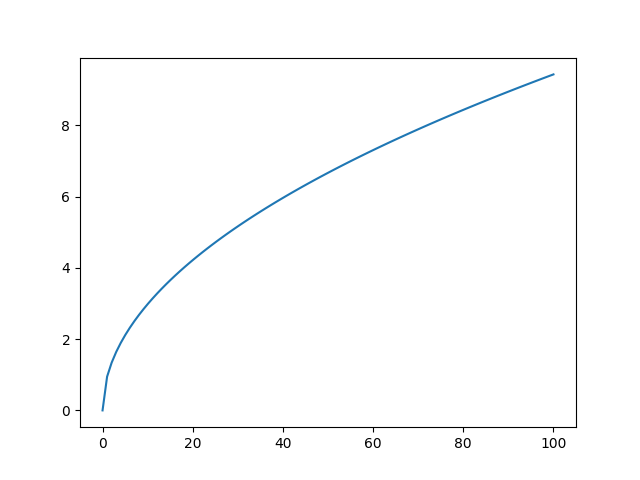

In [3]:
T = np.linspace(0, 100, 100)
theta = (2, 1.5)
y = [h0_Weibull(t, theta) for t in T]
plt.figure()
plt.plot(T,y)
plt.show()

In [4]:
def psi(x):
    return x**2 + x

In [5]:
# Hazard rate function with covariate 
# Weibull
def h_Weibull(t,theta,x):
    h_Weibull = h0_Weibull(t,theta)*np.exp(psi(x))
    return h_Weibull

def H_Weibull(t,theta,x):
    H_Weibull = H0_Weibull(t,theta)*np.exp(psi(x))
    return H_Weibull 

def survival_func_Weibull(t,theta,x):
    return np.exp(-H_Weibull(t,theta,x))

In [6]:
theta = (2, 1.5)

## Affichage d'exemples 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
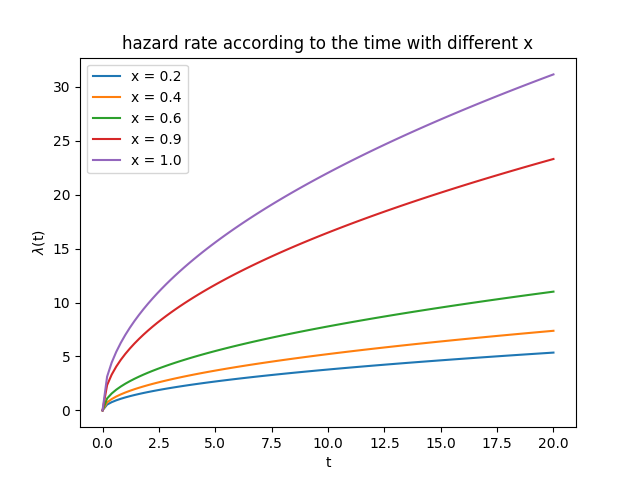

In [7]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 20, 100)
plt.figure()
for x in X : 
    y = [h_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('$\lambda$(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
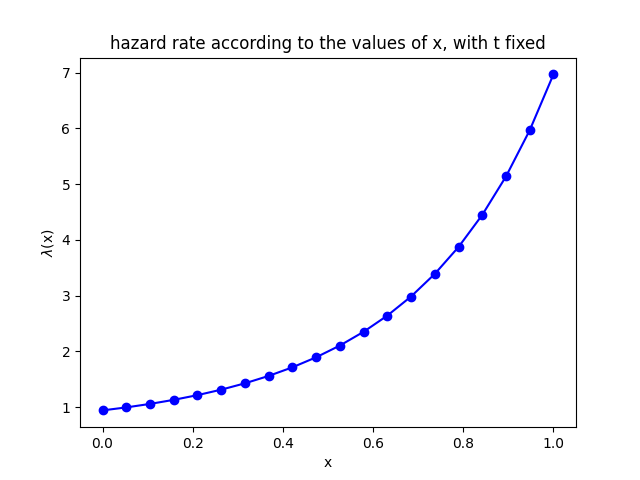

In [8]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [h_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('$\lambda$(x)')
plt.title('hazard rate according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
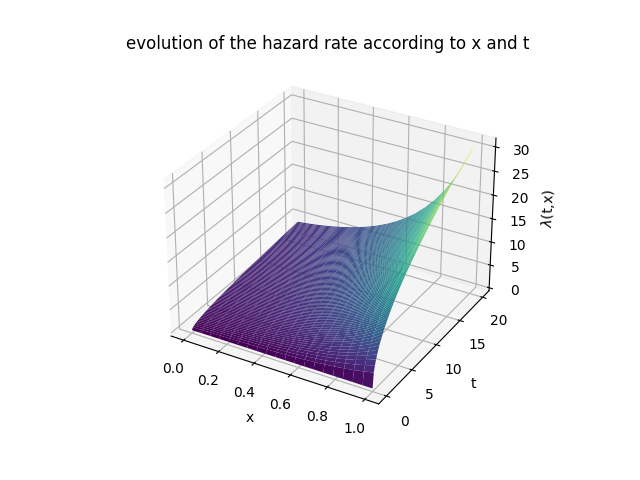

In [9]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
h_val = h_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, h_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the hazard rate according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('$\lambda$(t,x)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
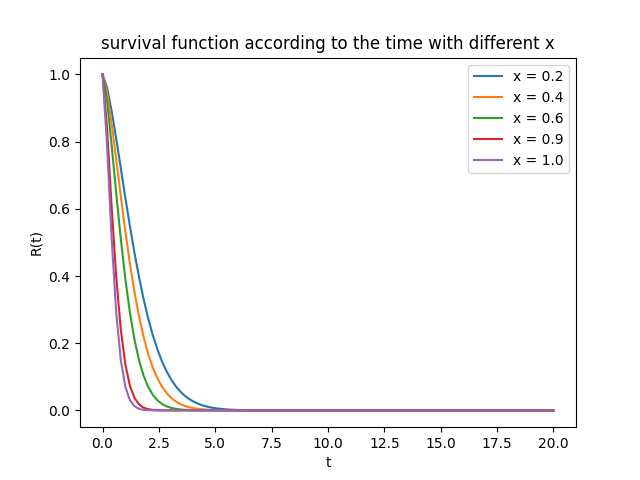

In [10]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 20, 100)
plt.figure()
for x in X : 
    y = [survival_func_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('survival function according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
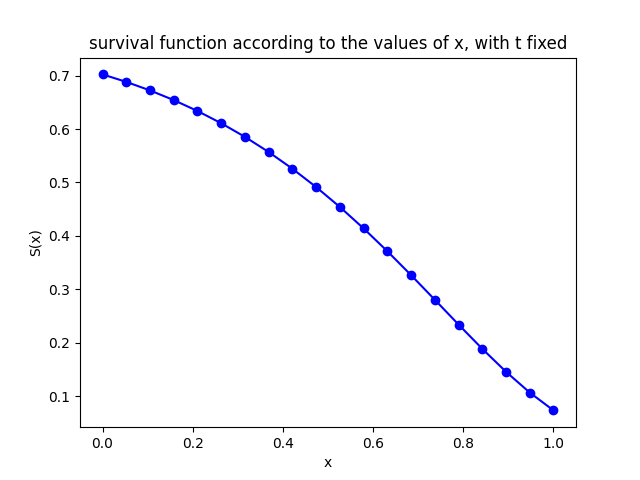

In [11]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [survival_func_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('survival function according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
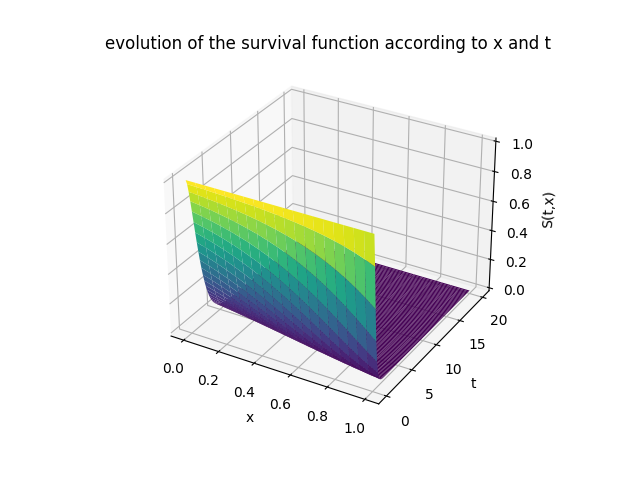

In [12]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
S_val = survival_func_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, S_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the survival function according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('S(t,x)')
plt.show()

## Data generation 

In [18]:
# outputs :
# T : death times
# X : value of the covariable for each individual
# delta[i] : censure or not of i-th individual
def power_of_list(liste: list, power: float):
    l = []
    for i in liste:
        l.append(i ** power)
    return l


def invg(x, theta=theta, n=100):
    alpha = theta[0]
    beta = theta[1]
    np.random.seed(10)
    R = np.random.uniform(0, 1, n)
    l = (alpha * (-np.log(R) * np.exp(-psi(x))))
    liste = power_of_list(
        liste=l, power=(1 / beta)
    )
    return liste


def genere_data(x, n=100, theta=theta):
    alpha = theta[0]
    beta = theta[1]
    T = invg(x, theta=theta,n=n)
    X = x * np.ones(len(T))
    delta = [True for t in range(len(T))]
    return np.array(T), X, delta

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
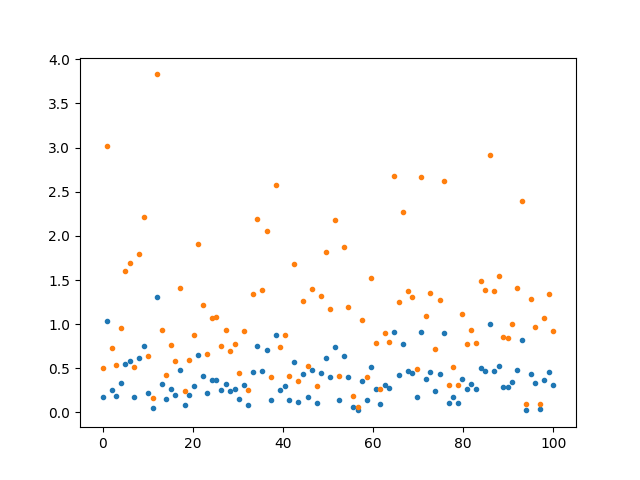

In [19]:
x1 = 1
T1, X1, delta1 = genere_data(x1, n=100)

x2 = 0.3
T2, X2, delta2 = genere_data(x2, n=100)

plt.figure()
plt.plot(np.linspace(0,100,100),T1,'.')
plt.plot(np.linspace(0,100,100),T2,'.')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
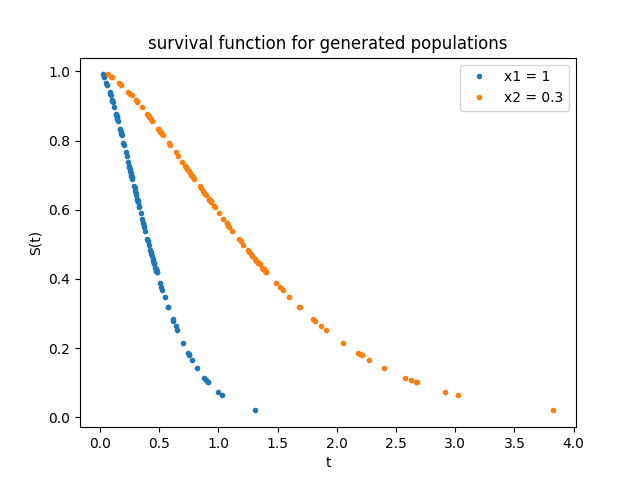

In [27]:
# T_source = np.linspace(0, 1.2, 100)
plt.figure()
y = [survival_func_Weibull(t,theta,x1) for t in T1]
plt.plot(T1, y, '.', label = 'x1 = '+str(x1))

y = [survival_func_Weibull(t,theta,x2) for t in T2]
plt.plot(T2, y, '.', label = 'x2 = '+str(x2))
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('survival function for generated populations')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
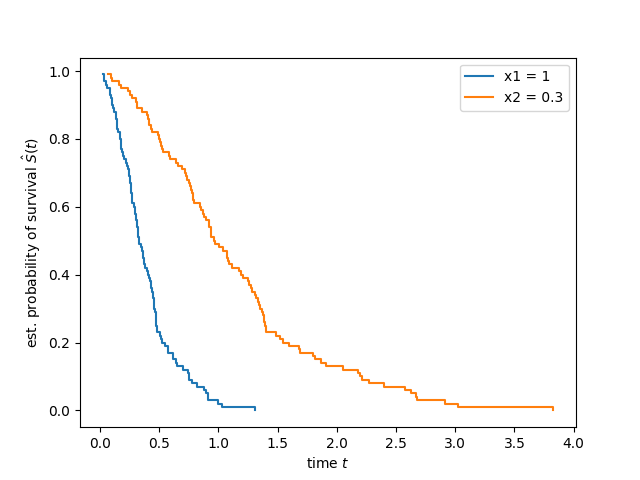

In [28]:
from sksurv.nonparametric import kaplan_meier_estimator

time1, survival_prob1 = kaplan_meier_estimator(delta1, T1)
time2, survival_prob2 = kaplan_meier_estimator(delta2, T2)
plt.figure()
plt.step(time1, survival_prob1, where="post", label = 'x1 = '+str(x1))
plt.step(time2, survival_prob2, where="post", label = 'x2 = '+str(x2))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend()
plt.show()

In [227]:
# Concatenating and sorting both populations 
T = np.concatenate((T1, T2))
X = np.concatenate((X1, X2))
delta = np.concatenate((delta1, delta2))
 
indexes = np.argsort(T)
T = T[indexes]
X = X[indexes]
delta = delta[indexes]

## Approximation of $\Psi$ as a linear function : partial likelihood

In [228]:
#Trier X, T, et delta en fonction de T 
def partial_likelihood(mu, population):
    T, X, delta = population
    dl = 0
    exp_x = np.exp([np.dot(mu.T, Xi) for Xi in X])
    X_exp_x = np.array([Xi * exp_xi for Xi, exp_xi in zip(X, exp_x)])
    for indiv in range(len(T)):
        dl += delta[indiv]*(X[indiv] - np.sum(X_exp_x[indiv:])/np.sum(exp_x[indiv:]))
    return dl

In [229]:
# Resolution
from scipy.optimize import fsolve
mu_opt = fsolve(partial_likelihood, 1 ,args = [T, X, delta])
print(mu_opt)

[2.45165246]


## Results of this approach  

In [230]:
def survival_Weibull_linear(t, theta, x, mu):
    return np.exp(-H0_Weibull(t,theta)*np.exp(mu*x))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
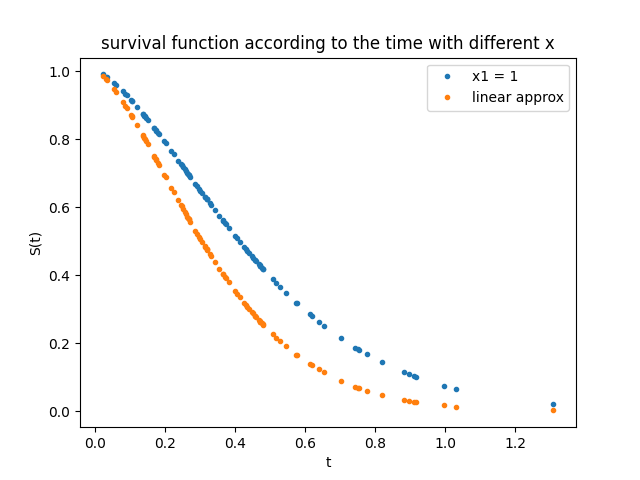

In [231]:
plt.figure()
y = [survival_func_Weibull(t,theta,x1) for t in T1]
plt.plot(T1, y, '.', label = 'x1 = '+str(x1))

y = [survival_Weibull_linear(t,theta,x1,mu_opt) for t in T1]
plt.plot(T1, y, '.', label = 'linear approx')

plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('survival function according to the time with different x')
plt.show()

## Local likelihood approach 

In [232]:
def K_gauss(u):
    return 1/np.sqrt(2*np.pi)*np.exp(-1/2*u**2)
    
#que mettre en h?
def Kh(t, h=2):
    return 1/h*K_gauss(t/h)

In [233]:
# p = 2
x = 0.2
X_tilde = np.array([[1, Xi-x, (Xi-x)**2] for Xi in X])

## derivation of the log likelihood according to gamma and theta

In [234]:
def dl_gamma(gamma, params):
    X_tilde, T, delta, theta = params
    n = len(T)
    dl = 0 
    for i in range(n):
        dl += (delta[i] - H0_Weibull(T[i], theta)*np.exp(X_tilde[i].T@gamma))*X_tilde[i].T*Kh(X_tilde[i][1])
    dl *= 1/n
    return dl 


def eps0_prime(t, theta):
    alpha, beta = theta
    #derived according to alpha
    d_alpha_num = 1/beta*(t/alpha)**(beta-1) + alpha/beta*(beta-1)*(-t/alpha**2)*(t/alpha)**(beta-2)
    d_alpha_denomin = alpha/beta*(t/alpha)**(beta-1)
    d_alpha = d_alpha_num/d_alpha_denomin
    #derived according to beta 
    d_beta_num = -alpha/beta**2*(t/alpha)**(beta-1) + alpha/beta * np.log(t/alpha) * (t/alpha)**(beta-1)
    d_beta_denomin = alpha/beta*(t/alpha)**(beta-1)
    d_beta = d_beta_num/d_beta_denomin
    return np.array([d_alpha, d_beta])


def H0_prime(t, theta):
    alpha, beta = theta
    d_alpha = beta/alpha * (t/alpha)**(beta-1)
    d_beta = np.log(t/alpha)*(t/alpha)**beta
    return np.array([d_alpha, d_beta])


def dl_theta(theta, params):
    X_tilde, T, delta, gamma = params
    n = len(T)
    dl = 0 
    for i in range(n):
        dl += (delta[i]*eps0_prime(T[i], theta) - H0_prime(T[i], theta)*np.exp(X_tilde[i].T@gamma))*Kh(X_tilde[i][1])
    dl *= 1/n
    return dl 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
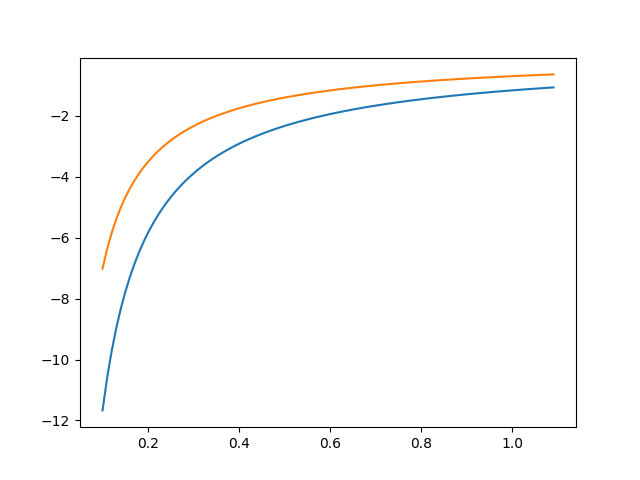

In [252]:
thetas = []
alphas = []
plt.figure()
for i in range(100):
    alphas.append(0.1+i/100)
paramss = [X_tilde, T, delta, [1,1,1]]
y = [dl_theta([0.1+i/100, 1], paramss)[0] for i in range(100)]
paramss = [X_tilde, T, delta, [1,1,0.1]]
y2 = [dl_theta([0.1+i/100, 1], paramss)[0] for i in range(100)]
plt.plot(alphas, y)
plt.plot(alphas, y2)
plt.show()

In [271]:
eps = 1e-2 
gamma_prec = [1, 1, 1]
theta_prec = [1, 1]

params_theta = [X_tilde, T, delta, gamma_prec]
theta_opt = fsolve(dl_theta, theta_prec ,args = params_theta)

params_gamma = [X_tilde, T, delta, theta_opt]
gamma_opt = fsolve(dl_gamma, gamma_prec ,args = params_gamma)

print(theta_opt)
print(gamma_opt)
#print("res=", dl_theta([2.10321631e+05, 1.58817375e-02], params_theta))

while np.linalg.norm(theta_opt - theta_prec) > eps or np.linalg.norm(gamma_opt - gamma_prec) > eps:
    theta_prec = theta_opt
    gamma_prec = gamma_opt 
    
    params_theta = [X_tilde, T, delta, gamma_prec]
    theta_opt = fsolve(dl_theta, [1,1] ,args = params_theta)
    print(theta_opt)
    
    params_gamma = [X_tilde, T, delta, theta_opt]
    gamma_opt = fsolve(dl_gamma, [1,1,1] ,args = params_gamma)
    print(gamma_opt)

[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]
[1.66917133 3.37735718 0.63490962]
[3.77452629 3.43429624]
[1. 1. 1.]
[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]
[1.66917133 3.37735718 0.63490962]
[3.77452629 3.43429624]
[1. 1. 1.]
[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]
[1.66917133 3.37735718 0.63490962]
[3.77452629 3.43429624]
[1. 1. 1.]
[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]
[1.66917133 3.37735718 0.63490962]
[3.77452629 3.43429624]
[1. 1. 1.]
[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]
[1.66917133 3.37735718 0.63490962]
[3.77452629 3.43429624]
[1. 1. 1.]
[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]
[1.66917133 3.37735718 0.63490962]
[3.77452629 3.43429624]
[1. 1. 1.]
[2.78633112 1.84575557]
[1.21929523 1.56354406 1.40734943]
[3.18906416 2.57528859]

KeyboardInterrupt: 

## Results of this approach 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
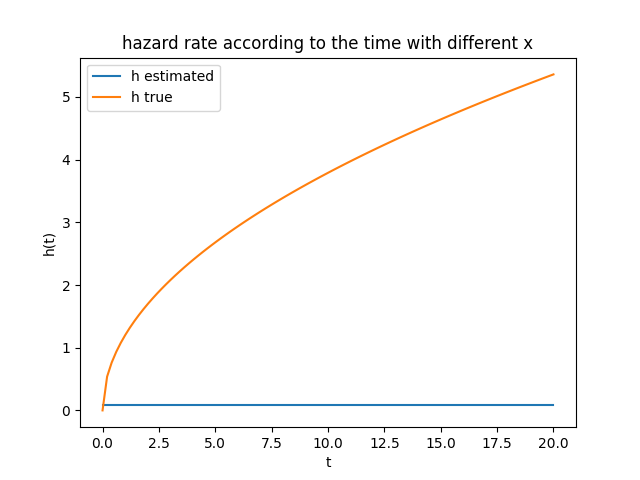

In [211]:
T = np.linspace(0, 20, 100)
plt.figure()
y_hat = [h0_Weibull(t,theta_opt)*np.exp(gamma_opt[0]) for t in T]
y_true = [h_Weibull(t,theta,x) for t in T]
plt.plot(T, y_hat, label = 'h estimated')
plt.plot(T, y_true, label = 'h true')
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()